<a href="https://colab.research.google.com/github/alem-147/Feature_Extraction/blob/main/Feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import packages**


## **Load and visualize MNIST data**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from skimage import measure
import pandas as pd

import warnings
warnings.filterwarnings("ignore") # Added this at the end to show a clean output with no warnings but not necessary 

### Choose number to visualize (from 0 to 9):

In [76]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [77]:
number = 0
x = x_train[y_train==number,:,:]
print('The shape of x is:')
print(x.shape)
print('which means:')
print('Number '+str(number)+' has '+str(x.shape[0])+' images of size '+str(x.shape[1])+'x'+str(x.shape[2]))

The shape of x is:
(5923, 28, 28)
which means:
Number 0 has 5923 images of size 28x28


### Plot average image:

Text(0.5, 1.0, 'Thresholded image')

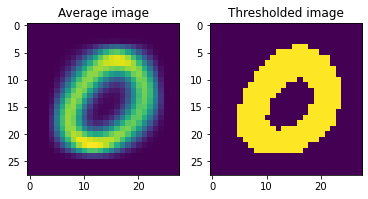

In [78]:
m = np.mean(x, axis=0) 

# print(x[0])
# print(m)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(m)
plt.title('Average image')

mt = 1*(m > 60) # Thresholding
plt.subplot(1,2,2)
plt.imshow(mt)
plt.title('Thresholded image')

## From a thresholded image, we can use the regionprops function from skimage.measure

In [79]:
mt_props = measure.regionprops(mt)
num_regions = len(mt_props)
print(str(num_regions)+' region/s were found')
print('')

print('Area (in pixels):')
area = mt_props[0].area # Remember, index 0 is the first region found
print(area)
print('')

print('Perimeter (in pixels):')
perimeter = mt_props[0].perimeter
print(perimeter)
print('')

print('Centroid (pixel coordinates):')
centroid = mt_props[0].centroid
print(centroid)

print('Eccentricity:')
eccentricity = mt_props[0].eccentricity
print(eccentricity)
print('')

print('Minor axis length:')
minor_axis = mt_props[0].minor_axis_length
print(minor_axis)
print('')



1 region/s were found

Area (in pixels):
237

Perimeter (in pixels):
93.74011537017762

Centroid (pixel coordinates):
(13.978902953586498, 14.080168776371307)
Eccentricity:
0.6181813464414365

Minor axis length:
18.53176476195907



## Example: Scatter plot of Area vs Perimeter for all images of numbers "number" and "number+1"
### Are "Area" and "Perimeter" good features to classify "number" and "number+1"?

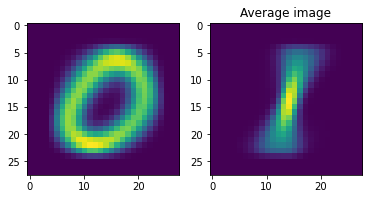

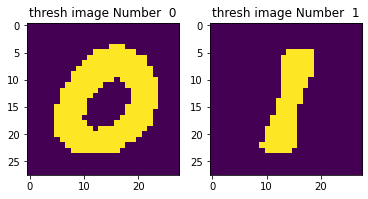

In [80]:
x5 = x_train[y_train==number,:,:]
x6 = x_train[y_train==number+1,:,:]
buf5 = "Number  %d" % number
buf6 = "Number  %d" % (number+1)
# Threshold images
t5 = 1*(x5 > 60)
t6 = 1*(x6 > 60)

m5 = np.mean(x5, axis=0) 
m6 = np.mean(x6, axis=0) 

plt.figure()
plt.subplot(1,2,1)
plt.imshow(m5)
plt.subplot(1,2,2)
plt.imshow(m6)

plt.title('Average image')

mt5 = 1*(m5 > 60)
mt6 = 1*(m6 > 60)

plt.figure()

plt.subplot(1,2,1)
plt.title('thresh image ' + buf5)
plt.imshow(mt5)
plt.subplot(1,2,2)
plt.title('thresh image ' + buf6)
plt.imshow(mt6)
# mt = 1*(m > 60) # Thresholding
# plt.subplot(1,2,2)
# plt.imshow(mt)
# plt.title('Thresholded image')

Text(0.5, 1.0, 'perim')

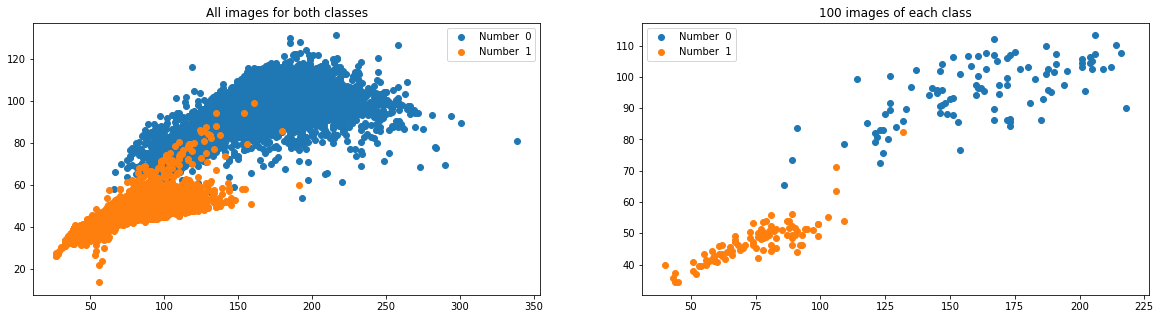

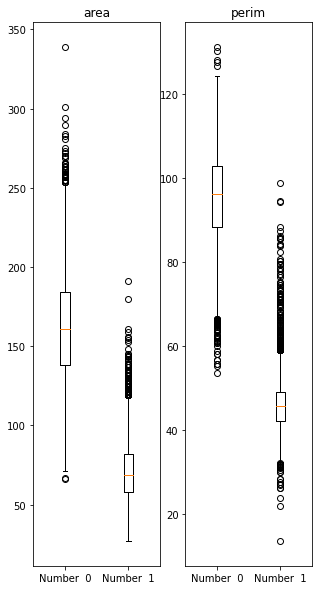

In [81]:
x5 = x_train[y_train==number,:,:]
x6 = x_train[y_train==number+1,:,:]
buf5 = "Number  %d" % number
buf6 = "Number  %d" % (number+1)
# Threshold images
t5 = 1*(x5 > 60)
t6 = 1*(x6 > 60)

# Region properties
area5 = np.zeros(t5.shape[0])
perimeter5 = np.zeros(t5.shape[0])
for i in range(0,t5.shape[0]):
  props = measure.regionprops(t5[i,:,:])
  area5[i] = props[0].area
  perimeter5[i] = props[0].perimeter
  
area6 = np.zeros(t6.shape[0])
perimeter6 = np.zeros(t6.shape[0])
for i in range(0,t6.shape[0]):
  props = measure.regionprops(t6[i,:,:])
  area6[i] = props[0].area
  perimeter6[i] = props[0].perimeter
  
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(area5,perimeter5, label=buf5)
plt.scatter(area6,perimeter6, label=buf6)
plt.title('All images for both classes')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(area5[0:100],perimeter5[0:100], label=buf5)
plt.scatter(area6[0:100],perimeter6[0:100], label=buf6)
plt.title('100 images of each class')
plt.legend()

plt.figure(figsize=(5,10))
plt.subplot(1,2,1)
plt.boxplot([area5, area6],labels=[buf5,buf6])
plt.title('area')

plt.subplot(1,2,2)
plt.boxplot([perimeter5, perimeter6],labels=[buf5,buf6])
plt.title('perim')

## Centroids and euclidian distance




{'whiskers': [<matplotlib.lines.Line2D at 0x7fa245b17150>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa245b17bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa245b11b50>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa245b1f6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa245b1fc10>,
 'means': []}

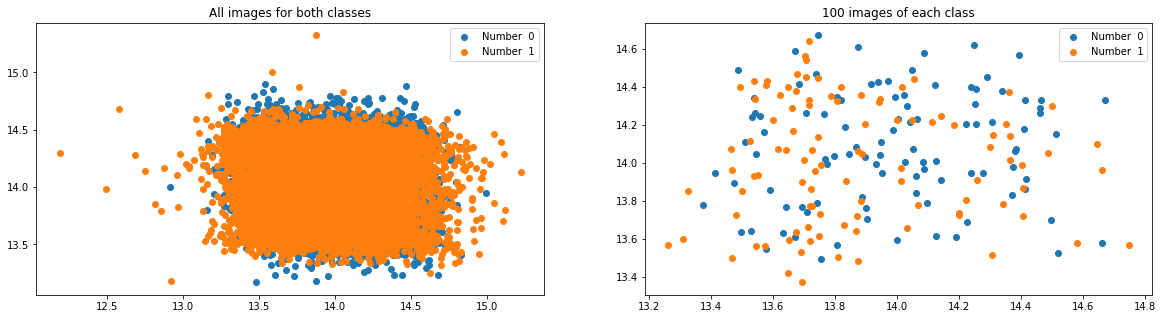

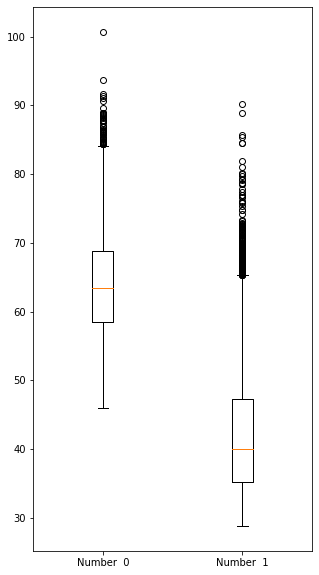

In [82]:
n1 = x_train[y_train==number,:,:]
n2 = x_train[y_train==number+1,:,:]
buf1 = "Number  %d" % number
buf2 = "Number  %d" % (number+1)
# Threshold images
thresh1 = 1*(n1 > 60)
thresh2 = 1*(n2 > 60)

# Region properties (centroid)

centroid1 = np.zeros((thresh1.shape[0],2), dtype='float')
# print(centroid1.shape)
for i in range(0, thresh1.shape[0]):
  props = measure.regionprops(thresh1[i,:,:])
  centroid1[i][0],centroid1[i][1] = props[0].centroid

x1, y1 = centroid1.T
# print("centroids for:", number, centroid1)

centroid2 = np.zeros((thresh2.shape[0],2), dtype='float')
for i in range(0, thresh2.shape[0]):
  props = measure.regionprops(thresh2[i,:,:])
  centroid2[i][0],centroid2[i][1] = props[0].centroid

x2, y2 = centroid2.T
# print("centroids for:", number + 1, centroid2)

# Variability of values (euc distance of each pixel value to labels average pixel value)
mean1 = np.mean(n1, axis=0)
# print(mean1)
euc_dist1 = np.zeros(n1.shape[0])
for i in range(0, n1.shape[0]):
  euc_dist1[i] = np.sqrt(np.mean(np.square(n1[i]-mean1)))

mean2 = np.mean(n2, axis=0)
euc_dist2 = np.zeros(n2.shape[0])
for i in range(0, n2.shape[0]):
  euc_dist2[i] = np.sqrt(np.mean(np.square(n2[i]-mean2)))

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.scatter(x1,y1, label=buf1)
plt.scatter(x2,y2, label=buf2)
plt.title('All images for both classes')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(x1[0:100],y1[0:100], label=buf1)
plt.scatter(x2[0:100],y2[0:100], label=buf2)
plt.title('100 images of each class')
plt.legend()

plt.figure(figsize=(5,10))
plt.boxplot([euc_dist1, euc_dist2],labels=[buf1,buf2])


## eccentircity

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa2459a6750>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa24599e210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa2459a6190>,
 'medians': [<matplotlib.lines.Line2D at 0x7fa24599ecd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa245998250>,
 'means': []}

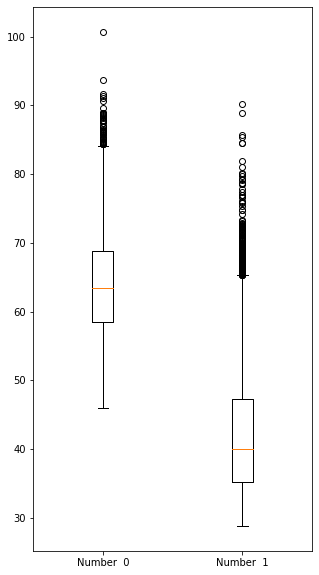

In [83]:
# print('Eccentricity:')
# eccentricity = mt_props[0].eccentricity
# print(eccentricity)
# print('')


n1 = x_train[y_train==number,:,:]
n2 = x_train[y_train==number+1,:,:]
buf1 = "Number  %d" % number
buf2 = "Number  %d" % (number+1)
# Threshold images
thresh1 = 1*(n1 > 60)
thresh2 = 1*(n2 > 60)

# Region properties (centroid)

ecc1 = np.zeros(thresh1.shape[0], dtype='float')
for i in range(0, thresh1.shape[0]):
  props = measure.regionprops(thresh1[i,:,:])
  ecc1[i] = props[0].eccentricity

ecc2 = np.zeros(thresh2.shape[0], dtype='float')
for i in range(0, thresh2.shape[0]):
  props = measure.regionprops(thresh2[i,:,:])
  ecc2[i] = props[0].eccentricity

plt.figure(figsize=(5,10))
plt.boxplot([euc_dist1, euc_dist2],labels=[buf1,buf2])

## Fisher Discriminant


### Data organization

In [85]:
n1 = x_train[y_train==number,:,:]
n2 = x_train[y_train==number+1,:,:]
buf1 = "Number  %d" % number
buf2 = "Number  %d" % (number+1)
# Threshold images
thresh1 = 1*(n1 > 60)
thresh2 = 1*(n2 > 60)

# mean images
mean1 = np.mean(n1, axis=0)
mean2 = np.mean(n2, axis=0)

# dataframes
df1 = pd.DataFrame(columns = ['number', 'area', 'perimeter', 'eccentricity', 'euc_distance'])

for i in range(0, thresh1.shape[0]):
  label = measure.label(thresh1[i]);
  reigon_props = measure.regionprops(thresh1[i])
  area = reigon_props[0].area
  eccentricity = reigon_props[0].eccentricity
  perimeter = reigon_props[0].perimeter
  euc_dist = np.sqrt(np.mean(np.square(n1[i]-mean1)))
  props = {'number': int(number), 'area': area, 'perimeter': perimeter,
           'eccentricity': eccentricity, 'euc_distance': euc_dist}
  df1 = df1.append(props, ignore_index = True)

print(df1)

df2 = pd.DataFrame(columns = ['number', 'area', 'perimeter', 'eccentricity', 'euc_distance'])

for i in range(0, thresh2.shape[0]):
  label = measure.label(thresh2[i]);
  #for some reason, table likes to return all values as an array
  reigon_props = measure.regionprops(thresh2[i])
  area = reigon_props[0].area
  eccentricity = reigon_props[0].eccentricity
  perimeter = reigon_props[0].perimeter
  euc_dist = np.sqrt(np.mean(np.square(n2[i]-mean2)))
  props = {'number': int(number + 1), 'area': area, 'perimeter': perimeter,
           'eccentricity': eccentricity, 'euc_distance': euc_dist}
  df2 = df2.append(props, ignore_index = True)

print(df2)

data_1_len = len(df1)
data_2_len = len(df2)
final_df = df1.append(df2, ignore_index=True)

      number   area   perimeter  eccentricity  euc_distance
0        0.0  146.0   90.669048      0.781016     47.957883
1        0.0  167.0   89.597980      0.792125     53.932104
2        0.0  173.0   84.183766      0.847741     70.004138
3        0.0  173.0   85.633514      0.813653     60.507874
4        0.0  209.0  102.426407      0.678870     62.192703
...      ...    ...         ...           ...           ...
5918     0.0  144.0   95.982756      0.895126     75.402717
5919     0.0  112.0   62.006097      0.917373     69.705535
5920     0.0  149.0   91.704581      0.910148     71.335325
5921     0.0  166.0  102.225397      0.895191     67.745861
5922     0.0  162.0   99.154329      0.870883     70.221402

[5923 rows x 5 columns]
      number  area  perimeter  eccentricity  euc_distance
0        1.0  81.0  52.284271      0.987028     48.303703
1        1.0  81.0  44.485281      0.978445     51.274870
2        1.0  51.0  37.863961      0.990063     41.903451
3        1.0  54.0  39.

### Training

In [86]:
#seperate data from classes

class_1 = np.array(df1[['area', 'perimeter', 'eccentricity', 'euc_distance']])
class_2 = np.array(df2[['area', 'perimeter', 'eccentricity', 'euc_distance']])

#find means
mu_1 = class_1.mean(axis=0).reshape(-1,1)
mu_2 = class_2.mean(axis=0).reshape(-1,1)

#find scatter between
# scatter_1 = np.size(class_1,0) * np.cov(class_1.T)
# scatter_2 = np.size(class_2,0) * np.cov(class_2.T)
scatter_1 = np.cov(class_1.T)
scatter_2 = np.cov(class_2.T)
scatter_within = scatter_1 + scatter_2
scatter_inv = np.linalg.inv(scatter_within)

boundary = scatter_inv.dot(mu_1-mu_2)
print(boundary)



[[-0.01562192]
 [ 0.32199222]
 [-2.8028605 ]
 [ 0.09539497]]


In [87]:
trainingc1_datapoint = class_1[1]
trainingc2_datapoint = class_2[10]
print(trainingc1_datapoint)
# print(boundary[])
res = boundary.T.dot(trainingc1_datapoint)
res_2 = boundary.T.dot(trainingc2_datapoint)
print(res)
print(res_2)

[167.          89.59797975   0.79212465  53.93210405]
[29.16562914]
[12.38374877]


### finding the threshold

In [88]:
X = np.array(final_df[['area', 'perimeter', 'eccentricity', 'euc_distance']])
y = np.array(final_df['number'])

res = np.zeros(np.size(X,0))
# print(res.shape)
for i in range(0,len(X)):
  # res[i] = 10000*(boundary.T.dot(X[i]))
  res[i] = (boundary.T.dot(X[i]))

T = range(0,100)
# T = np.arange(0,100,.1)
predictions = np.zeros(np.size(X,0))
final_tresh = 0
max_correct = 0
for t in T:
  correct = 0
  for i in range(0,len(res)):
    # predictions[i] = 1 if res[i] > t else 0
    prediction = number if res[i] > t else number+1
    correct += (prediction == int(y[i]))
  # print(f"correct for {t}: {correct}\n")
  if correct > max_correct:
    max_correct = correct
    final_thresh = t
print(final_thresh)
print(max_correct)
correct = 0
for t in np.arange(start=final_thresh-3, stop=final_thresh+4, step=.1):
  correct = 0
  for i in range(0,len(res)):
    # predictions[i] = 1 if res[i] > t else 0
    prediction = number if res[i] > t else number+1
    correct += (prediction == int(y[i]))
  # print(f"correct for {t}: {correct}\n")
  if correct > max_correct:
    max_correct = correct
    final_thresh = t
# final_thresh = (math.floor(final_thresh*10)/10)/10000
final_thresh = (math.floor(final_thresh*10)/10)

print(final_thresh)
# print(max_correct)

23
12574
23.0


In [89]:
res = np.zeros(np.size(X,0))
print("num samples", len(X))

correct = 0
FN = 0
FP = 0
TN = 0
TP = 0
# print(res.shape)
for i in range(0,len(X)):
  res[i] = (boundary.T.dot(X[i]))
  prediction = number if res[i] > final_thresh else number+1
  correct += (prediction == int(y[i]))
  TP += (prediction == int(y[i]) and int(y[i]) == number)
  FP += (prediction == number and int(y[i]) != number)
  TN += (prediction == int(y[i]) and int(y[i]) != number)
  FN += (prediction != number and int(y[i]) == number)

assert(TP+TN+FP+FN == len(y))
print(f"TP {TP}, TN {TN}, FN {FN}, FP {FP}")
percent_correct = correct/len(y)
print(f"num correct {correct}")
print(f"percent correct {percent_correct}")
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
balanced_accuracy = (sensitivity+specificity)/2
print(f"balanced accuracy {balanced_accuracy}")

num samples 12665
TP 5900, TN 6674, FN 23, FP 68
num correct 12574
percent correct 0.9928148440584288
balanced accuracy 0.993015402400619


### Testing

In [90]:
n1 = x_test[y_test==number,:,:]
n2 = x_test[y_test==number+1,:,:]
buf1 = "Number  %d" % number
buf2 = "Number  %d" % (number+1)
# Threshold images
thresh1 = 1*(n1 > 60)
thresh2 = 1*(n2 > 60)

# mean images
mean1 = np.mean(n1, axis=0)
mean2 = np.mean(n2, axis=0)

# dataframes
df1 = pd.DataFrame(columns = ['number', 'area', 'perimeter', 'eccentricity', 'euc_distance'])

for i in range(0, thresh1.shape[0]):
  label = measure.label(thresh1[i]);
  reigon_props = measure.regionprops(thresh1[i])
  area = reigon_props[0].area
  eccentricity = reigon_props[0].eccentricity
  perimeter = reigon_props[0].perimeter
  euc_dist = np.sqrt(np.mean(np.square(n1[i]-mean1)))
  props = {'number': int(number), 'area': area, 'perimeter': perimeter,
           'eccentricity': eccentricity, 'euc_distance': euc_dist}
  df1 = df1.append(props, ignore_index = True)

# print(df1)

df2 = pd.DataFrame(columns = ['number', 'area', 'perimeter', 'eccentricity', 'euc_distance'])

for i in range(0, thresh2.shape[0]):
  label = measure.label(thresh2[i]);
  #for some reason, table likes to return all values as an array
  reigon_props = measure.regionprops(thresh2[i])
  area = reigon_props[0].area
  eccentricity = reigon_props[0].eccentricity
  perimeter = reigon_props[0].perimeter
  euc_dist = np.sqrt(np.mean(np.square(n2[i]-mean2)))
  props = {'number': int(number + 1), 'area': area, 'perimeter': perimeter,
           'eccentricity': eccentricity, 'euc_distance': euc_dist}
  df2 = df2.append(props, ignore_index = True)

# print(df2)

data_1_len = len(df1)
data_2_len = len(df2)
final_df = df1.append(df2, ignore_index=True)

In [91]:
X = np.array(final_df[['area', 'perimeter', 'eccentricity', 'euc_distance']])
y = np.array(final_df['number'])
print(f"num samples {len(y)}")
res = np.zeros(np.size(X,0))
correct = 0
FN = 0
FP = 0
TN = 0
TP = 0
# print(res.shape)
for i in range(0,len(X)):
  res[i] = (boundary.T.dot(X[i]))
  prediction = number if res[i] > final_thresh else number+1
  correct += (prediction == int(y[i]))
  TP += (prediction == int(y[i]) and int(y[i]) == number)
  FP += (prediction == number and int(y[i]) != number)
  TN += (prediction == int(y[i]) and int(y[i]) != number)
  FN += (prediction != number and int(y[i]) == number)

assert(TP+TN+FP+FN == len(y))
print(f"TP {TP}, TN {TN}, FN {FN}, FP {FP}")
percent_correct = correct/len(y)
print(f"num correct {correct}")
print(f"percent correct {percent_correct}")
sensitivity = TP/(TP+FN)
specificity = TN/(TN+FP)
balanced_accuracy = (sensitivity+specificity)/2
print(f"balanced accuracy {balanced_accuracy}")

num samples 2115
TP 976, TN 1126, FN 4, FP 9
num correct 2102
percent correct 0.9938534278959811
balanced accuracy 0.9939944259642183
